Initial notebook to explore/transform the dataset if necessary and test implementations for answering the research questions

In [206]:
import pandas as pd
BASE_DIR = '/home/nils/Documents/Repositories/semester-10/rse/rse_24_individual_project/'

In [208]:
df = pd.read_csv(BASE_DIR + 'data/71211-0005_$F.csv', skiprows=7, skipfooter=4, delimiter=';', engine='python')
col_names = [str(year) + '-' + str(month).zfill(2) for year in range(1999, 2025) for month in range(1, 13)]
df.iloc[11, 0] = 'Solidaritätszuschlag'
df.iloc[12, 0] = 'Vermögensteuer'
df.iloc[15, 0] = 'Getränkesteuer'
df.set_index(df.columns[0], drop=True, inplace=True)
df.index.rename('Tax name', inplace=True)
df.columns = col_names
df

,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,...,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
Tax name,,,,,,,,,,,,,,,,,,,,,
Steuereinnahmen insgesamt,x,x,x,x,x,x,x,x,x,x,...,x,...,...,...,...,...,...,...,...,...
Lohnsteuer,11414378,9017817,9408210,9901624,10305324,10899123,11808864,10746316,9816841,9741723,...,18053584,...,...,...,...,...,...,...,...,...
Umsatzsteuer,9781606,10800710,7446126,8299312,10062278,8624741,9199436,9722928,8977803,9160793,...,14140977,...,...,...,...,...,...,...,...,...
Tabaksteuer,262397,467387,1293379,1033580,464138,1314875,1037560,1031555,987725,1019922,...,840437,...,...,...,...,...,...,...,...,...
Kaffeesteuer,94728,104583,59526,69067,110246,85728,90298,89347,92551,89162,...,87983,...,...,...,...,...,...,...,...,...
Alkoholsteuer,56238,26494,301035,158755,147029,172750,187859,154749,151782,190649,...,152591,...,...,...,...,...,...,...,...,...
Alcopopsteuer,-,-,-,-,-,-,-,-,-,-,...,21,...,...,...,...,...,...,...,...,...
Schaumweinsteuer,3423,3364,85618,37614,24776,39510,35786,37779,35954,40251,...,21397,...,...,...,...,...,...,...,...,...
Energiesteuer,125256,1040966,2589290,2572635,3305707,3056618,2987063,3060415,3028981,2638811,...,2716635,...,...,...,...,...,...,...,...,...


In [195]:
df = df.apply(pd.to_numeric, downcast='integer', errors='coerce')
df = df.astype('Int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, Steuereinnahmen insgesamt to Schankerlaubnissteuer
Columns: 312 entries, 1999-01 to 2024-12
dtypes: Int64(312)
memory usage: 46.8+ KB


In [197]:
df

,1999-01,1999-02,1999-03,1999-04,1999-05,1999-06,1999-07,1999-08,1999-09,1999-10,...,2024-03,2024-04,2024-05,2024-06,2024-07,2024-08,2024-09,2024-10,2024-11,2024-12
Tax name,,,,,,,,,,,,,,,,,,,,,
Steuereinnahmen insgesamt,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Lohnsteuer,11414378,9017817,9408210,9901624,10305324,10899123,11808864,10746316,9816841,9741723,...,18053584,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Umsatzsteuer,9781606,10800710,7446126,8299312,10062278,8624741,9199436,9722928,8977803,9160793,...,14140977,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Tabaksteuer,262397,467387,1293379,1033580,464138,1314875,1037560,1031555,987725,1019922,...,840437,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Kaffeesteuer,94728,104583,59526,69067,110246,85728,90298,89347,92551,89162,...,87983,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Alkoholsteuer,56238,26494,301035,158755,147029,172750,187859,154749,151782,190649,...,152591,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Alcopopsteuer,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,21,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Schaumweinsteuer,3423,3364,85618,37614,24776,39510,35786,37779,35954,40251,...,21397,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>
Energiesteuer,125256,1040966,2589290,2572635,3305707,3056618,2987063,3060415,3028981,2638811,...,2716635,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>


In [193]:
df.to_csv(BASE_DIR + 'results/tax_data.csv')

<Axes: >

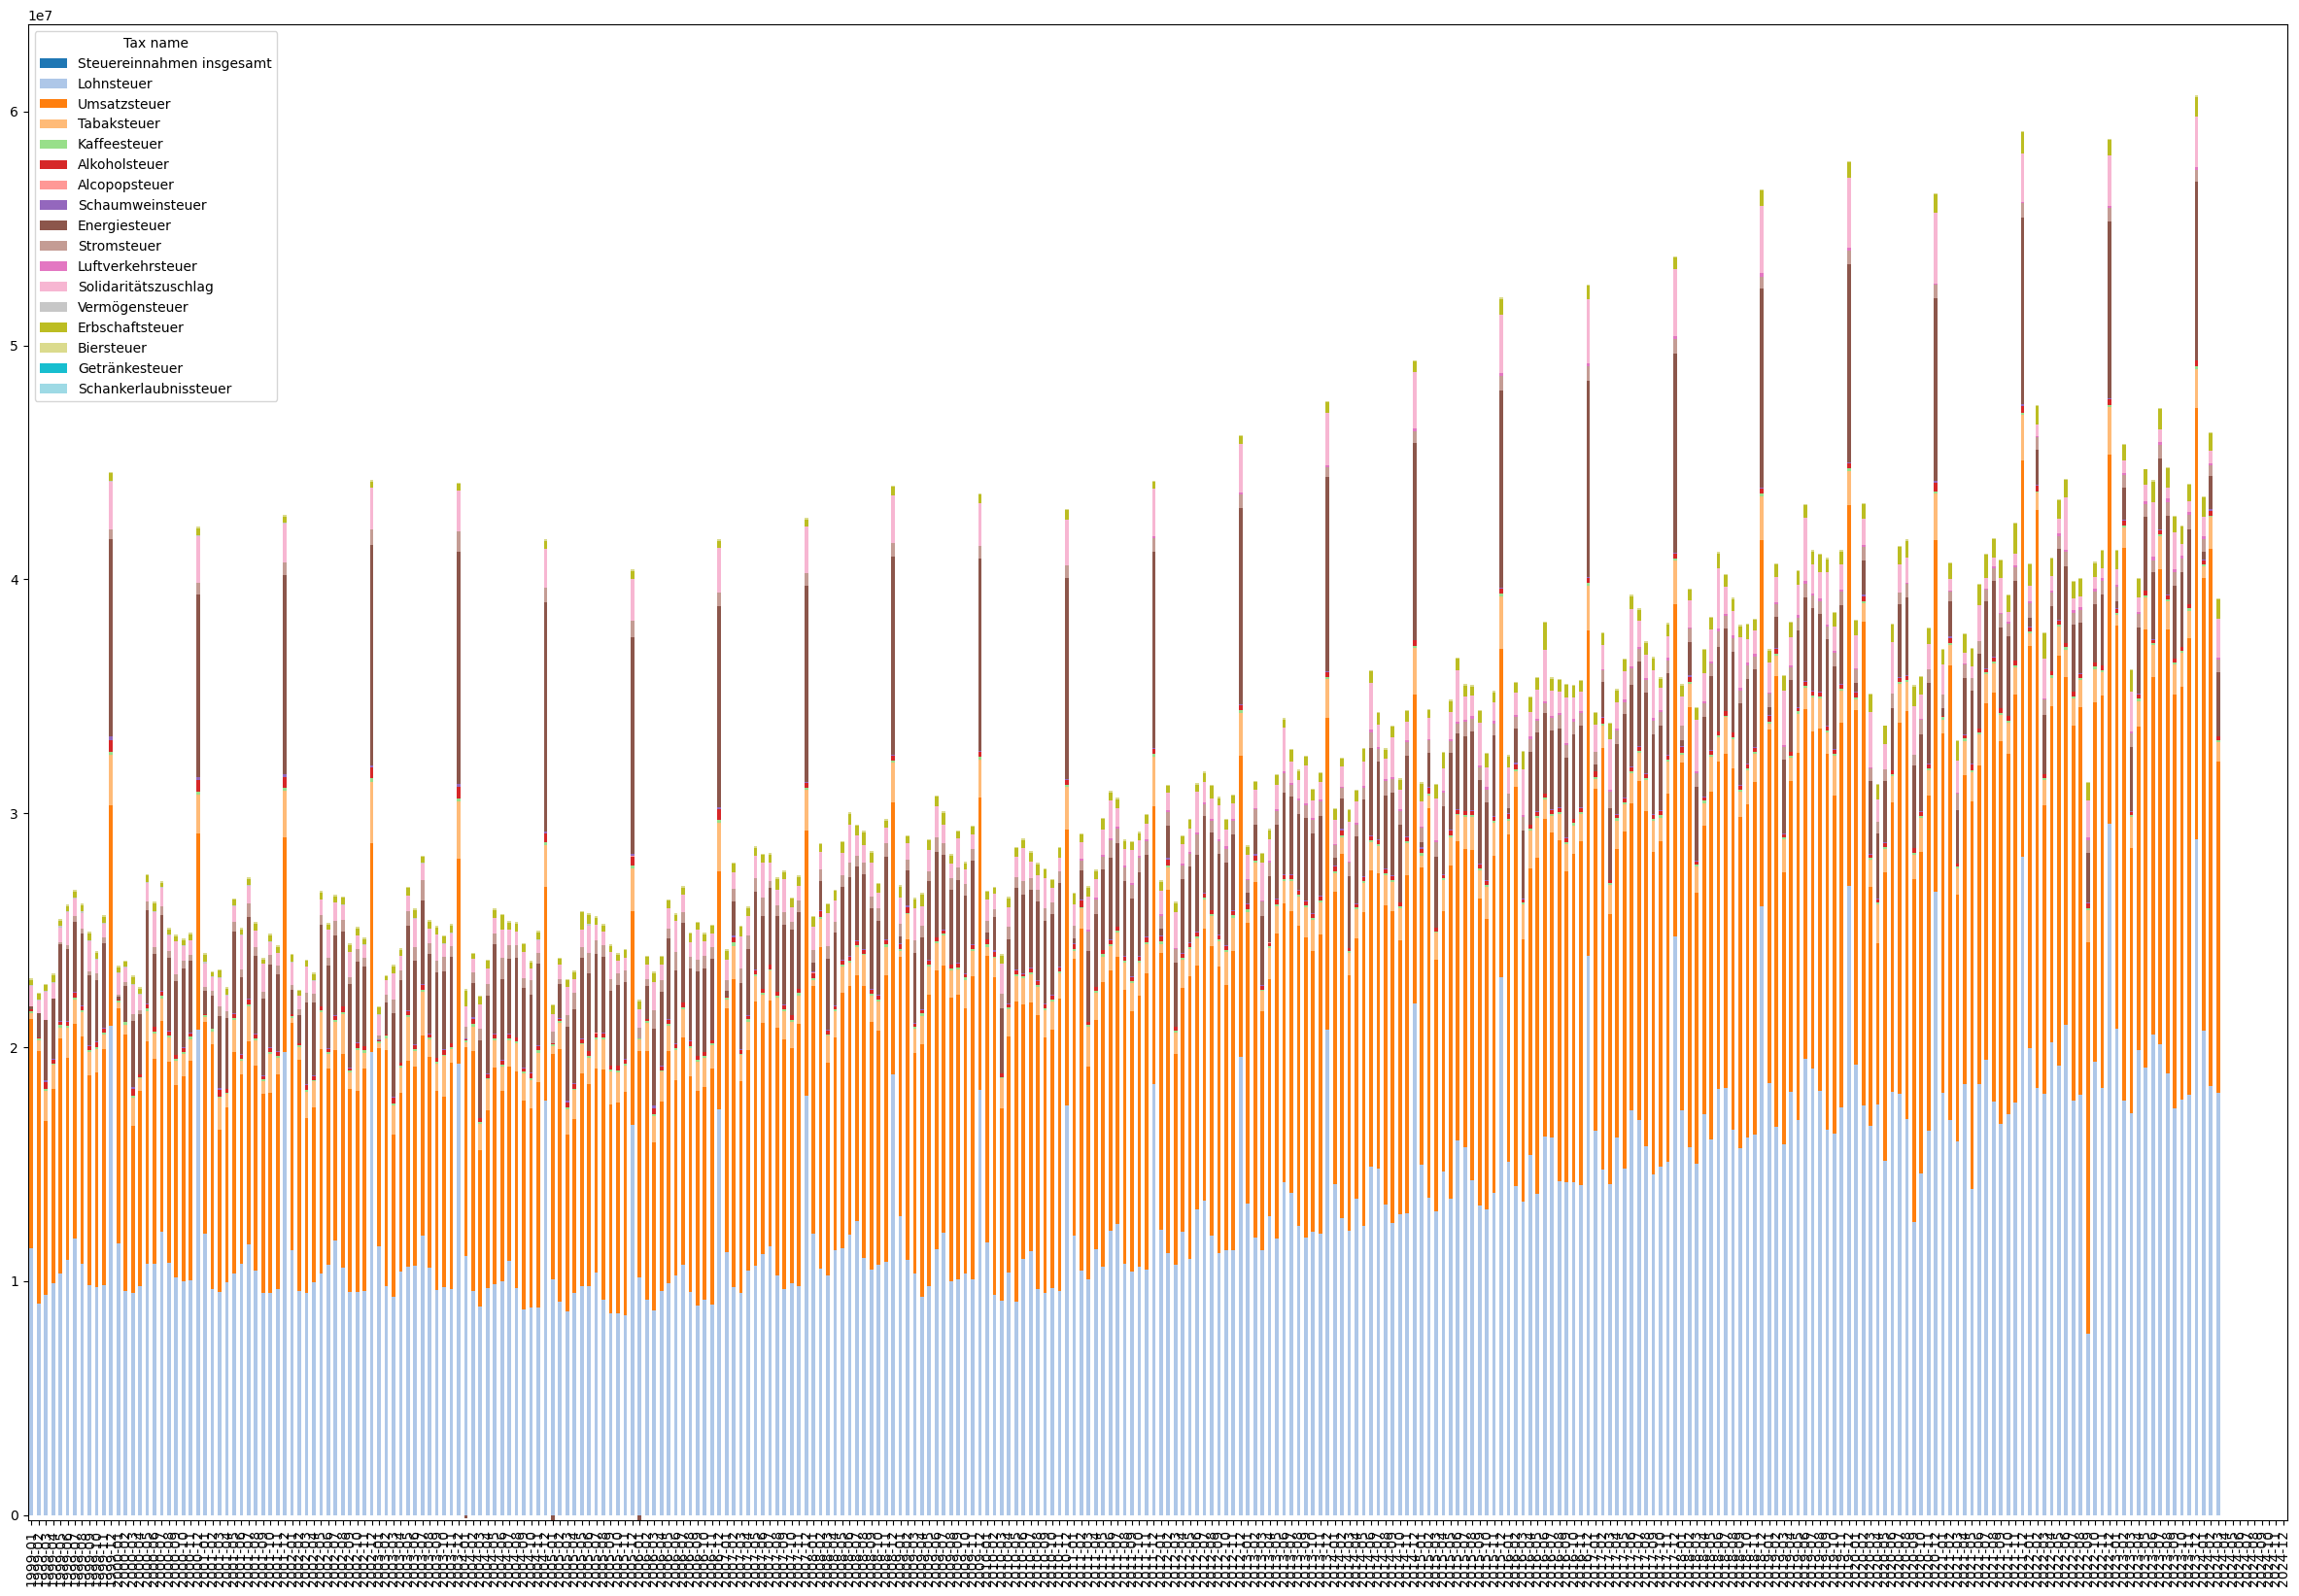

In [201]:
df.T.plot(figsize=(30, 20), kind='bar', stacked=True, colormap='tab20')

In [219]:
df_q = pd.read_csv(BASE_DIR + 'data/71211-0003_$F.csv', skiprows=7, skipfooter=4, delimiter=';', engine='python')
col_names = [str(year) + '-' + str(quarter) for year in range(1999, 2024) for quarter in range(1, 5)]
df_q.iloc[11, 0] = 'Solidaritätszuschlag'
df_q.iloc[12, 0] = 'Vermögensteuer'
df_q.iloc[15, 0] = 'Getränkesteuer'
df_q.set_index(df_q.columns[0], drop=True, inplace=True)
df_q.index.rename('Tax name', inplace=True)
df_q.columns = col_names
df_q

,1999-1,1999-2,1999-3,1999-4,2000-1,2000-2,2000-3,2000-4,2001-1,2001-2,...,2021-3,2021-4,2022-1,2022-2,2022-3,2022-4,2023-1,2023-2,2023-3,2023-4
Tax name,,,,,,,,,,,,,,,,,,,,,
Steuereinnahmen insgesamt,100811357,109083626,112585530,130568829,105492141,117975851,114221163,129545404,105744409,109990284,...,211363669,240569055,224006239,224537502,205543486,241628285,220949882,221224721,230108962,243610095
Lohnsteuer,29840405,31106071,32372022,40490555,30663837,31259791,33013155,40796283,31187638,30990505,...,53857237,62913140,56205953,60363075,43430526,67204988,55668701,59537726,56370020,64651006
Umsatzsteuer,28028442,26986332,27900167,28685520,28166641,26589221,25849362,26534321,26516488,25078799,...,49051831,49776605,54234153,46754710,49323059,47888729,52197500,47855253,56986261,55556965
Tabaksteuer,2023163,2812593,3056841,3762050,1887590,2955979,3062844,3536528,2076926,2500447,...,3636208,4458472,2371560,3648323,3742238,4467300,2668744,3830018,3879231,4293816
Kaffeesteuer,258836,265041,272196,310028,267017,237012,272843,309912,247689,246742,...,250641,279665,252982,287899,241383,280277,255056,257171,240168,277834
Alkoholsteuer,383766,478534,494390,876087,356164,467950,494056,832593,348875,464496,...,514434,651362,531490,504973,549090,605728,530190,517279,531653,579841
Alcopopsteuer,-,-,-,-,-,-,-,-,-,-,...,2254,-8096,318,483,872,739,336,424,391,275
Schaumweinsteuer,92404,101900,109519,241537,106140,81747,101202,188433,89631,80036,...,81638,109450,93657,80886,87493,90428,109100,82691,84296,84876
Energiesteuer,3755512,8934960,9076458,14676686,4446652,9639912,9507271,14232474,5460907,9796223,...,9531781,14745456,4451669,9092453,7103193,13019535,4361688,8796327,9477132,14023167


In [220]:
df_q = df_q.apply(pd.to_numeric, downcast='integer', errors='coerce')
df_q = df_q.astype('Int64')
df_q

,1999-1,1999-2,1999-3,1999-4,2000-1,2000-2,2000-3,2000-4,2001-1,2001-2,...,2021-3,2021-4,2022-1,2022-2,2022-3,2022-4,2023-1,2023-2,2023-3,2023-4
Tax name,,,,,,,,,,,,,,,,,,,,,
Steuereinnahmen insgesamt,100811357,109083626,112585530,130568829,105492141,117975851,114221163,129545404,105744409,109990284,...,211363669,240569055,224006239,224537502,205543486,241628285,220949882,221224721,230108962,243610095
Lohnsteuer,29840405,31106071,32372022,40490555,30663837,31259791,33013155,40796283,31187638,30990505,...,53857237,62913140,56205953,60363075,43430526,67204988,55668701,59537726,56370020,64651006
Umsatzsteuer,28028442,26986332,27900167,28685520,28166641,26589221,25849362,26534321,26516488,25078799,...,49051831,49776605,54234153,46754710,49323059,47888729,52197500,47855253,56986261,55556965
Tabaksteuer,2023163,2812593,3056841,3762050,1887590,2955979,3062844,3536528,2076926,2500447,...,3636208,4458472,2371560,3648323,3742238,4467300,2668744,3830018,3879231,4293816
Kaffeesteuer,258836,265041,272196,310028,267017,237012,272843,309912,247689,246742,...,250641,279665,252982,287899,241383,280277,255056,257171,240168,277834
Alkoholsteuer,383766,478534,494390,876087,356164,467950,494056,832593,348875,464496,...,514434,651362,531490,504973,549090,605728,530190,517279,531653,579841
Alcopopsteuer,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,2254,-8096,318,483,872,739,336,424,391,275
Schaumweinsteuer,92404,101900,109519,241537,106140,81747,101202,188433,89631,80036,...,81638,109450,93657,80886,87493,90428,109100,82691,84296,84876
Energiesteuer,3755512,8934960,9076458,14676686,4446652,9639912,9507271,14232474,5460907,9796223,...,9531781,14745456,4451669,9092453,7103193,13019535,4361688,8796327,9477132,14023167


<Axes: >

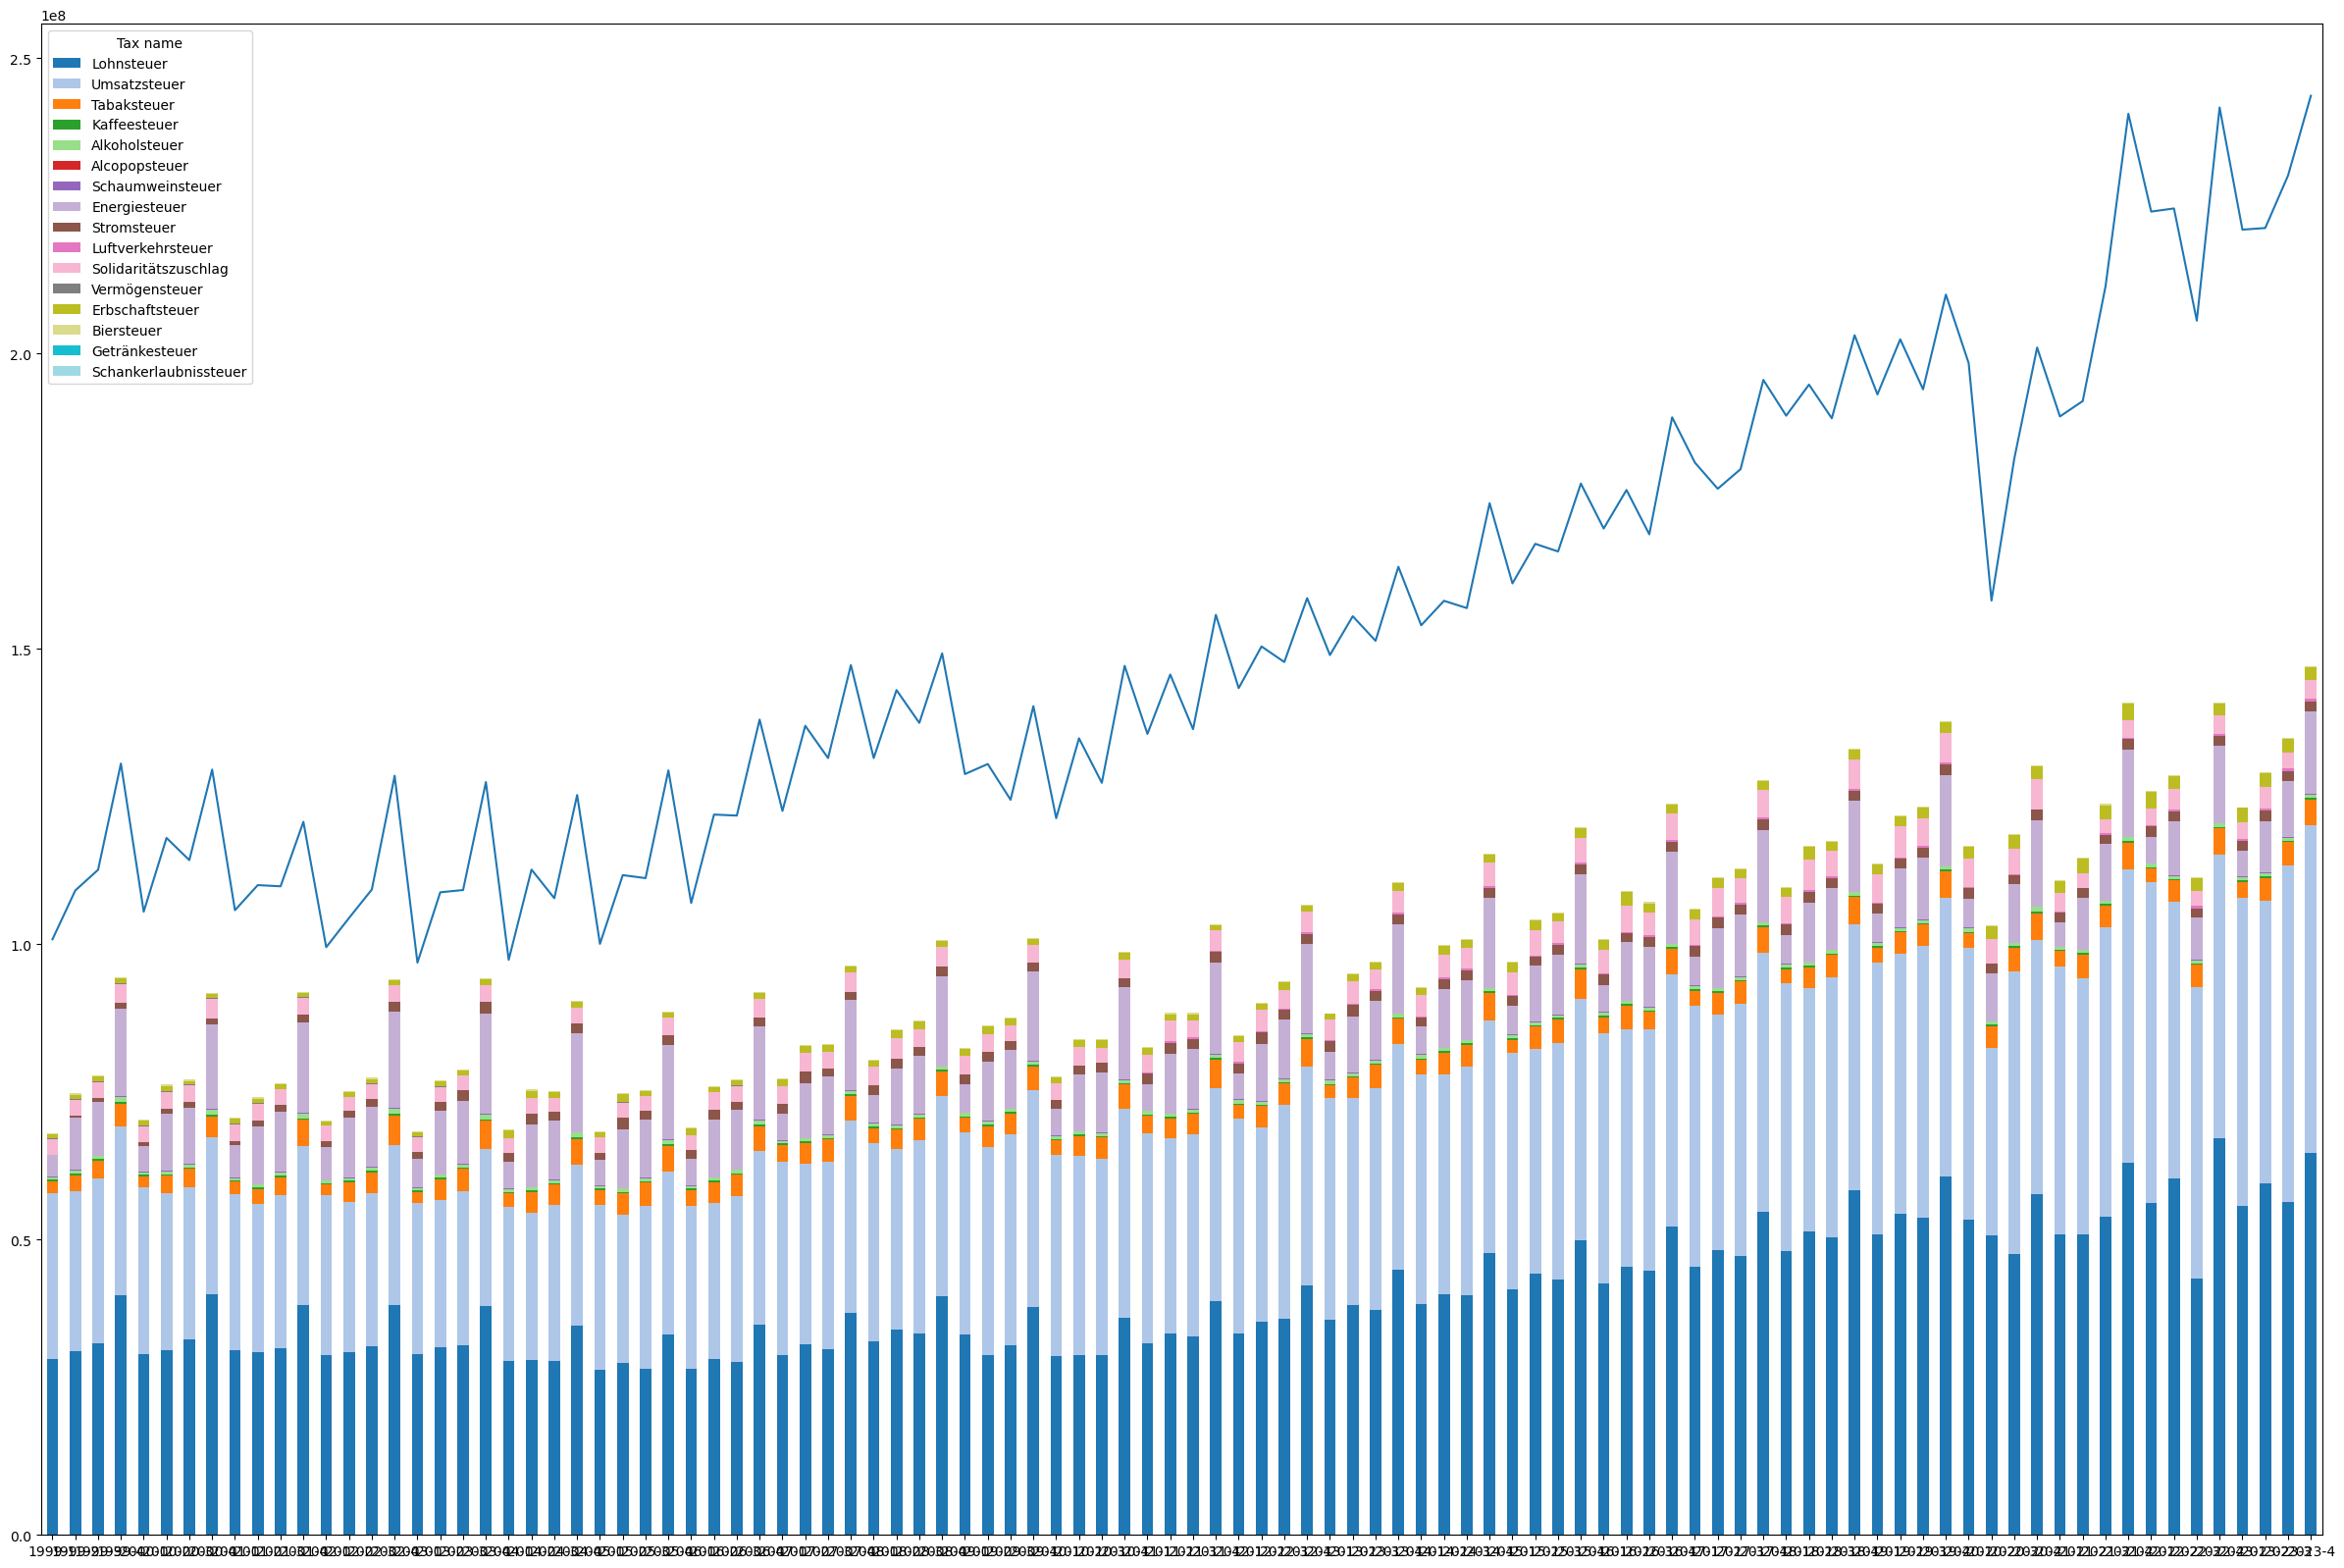

In [225]:
df_q[1:].T.plot(figsize=(30, 20), kind='bar', stacked=True, colormap='tab20')
df_q.iloc[0, :].plot(figsize=(30, 20))